![](https://drive.google.com/uc?export=view&id=1Lia_FfBLXQNdaWpV1jBPjSY93Lm8hy-H)




#**Integrantes**
- Gabriel Antonio Chavarro
- Michael Andrey Maldonado
- Dylan Francisco Jimenez

# **Introducción:**

> En el ámbito de la atención médica y la salud social, una correcta clasificación y gestión de los medicamentos es fundamental para garantizar una atención médica válida y eficaz. Gran parte de nuestras instituciones (fundaciones y hospitales) depende de una correcta organización y flujo de medicamentos bien organizados para poder atender a poblaciones vulnerables, siendo la clasificación manual un proceso caro y que puede estar sujeto a errores. La IA (inteligencia artificial) tiene la capacidad de automatizar y optimizar tal tarea, permitiendo una identificación rápida y precisa de diferentes medicamentos, lo que se traduce en una mejor organización de los recursos y, en consecuencia, en una mejora de la calidad de la atención recibida por parte de los pacientes y pacientes.

> El proyecto tiene como objetivo el desarrollo de unas redes neuronales convolucionales (CNN) para la clasificación de medicamentos. Ayudando a hospitales, fundaciones y demás organizaciones. Utilizando técnicas de aprendizaje profundo (deep learning) y una base de datos de imágenes de medicamentos, siendo capaz de identificar y clasificar de forma automática los distintos tipos de medicamentos.


# **Objetivos del Proyecto:**



*   Desarrollar un modelo de IA capaz de clasificar medicamentos a partir de imágenes, aprovechando el aprendizaje profundo y redes neuronales convolucionales.

*  Optimizar la precisión y eficiencia del modelo para minimizar el margen de error en la clasificación, asegurando así que las instituciones puedan confiar en la herramienta para tareas de identificación rápida y precisa.

*  Facilitar la gestión de inventarios en hospitales, fundaciones y otras instituciones de bienestar, permitiendo una mejor organización de los medicamentos y una rápida accesibilidad para el personal.

*  Implementar un sistema de despliegue que permita a estas instituciones utilizar la herramienta de manera práctica en sus operaciones diarias, ya sea a través de una aplicación web, móvil o software de escritorio.

*  Contribuir al bienestar social y a la eficiencia de los recursos médicos, mejorando la disponibilidad de medicamentos y el tiempo de respuesta en la atención de los pacientes.




#📚**LIBRERIAS**📚

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input, Concatenate

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#💻DATASET💻

In [ ]:
# Especificar la ruta al archivo CSV
file_path = '/content/drive/My Drive/ProyectoIA2/PHARMA-VISION/medicamentos.csv'

# Leer el CSV directamente en un DataFrame
df = pd.read_csv(file_path)

df.columns

Index(['expediente', 'producto', 'titular', 'registrosanitario',
       'fechaexpedicion', 'fechavencimiento', 'estadoregistro',
       'expedientecum', 'consecutivocum', 'cantidadcum',
       'descripcioncomercial', 'estadocum', 'fechaactivo', 'fechainactivo',
       'muestramedica', 'unidad', 'atc', 'descripcionatc', 'viaadministracion',
       'concentracion', 'principioactivo', 'unidadmedida', 'cantidad',
       'unidadreferencia', 'formafarmaceutica', 'nombrerol', 'tiporol',
       'modalidad', 'IUM'],
      dtype='object')

In [ ]:
df.head(5)

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad,IUM
0,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,12/20/1999,11/17/2026,Vigente,3521,1,30.0,...,B,CETIRIZINA DICLORHIDRATO,mg,10000000.0,100 ML DE JARABE,JARABE,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
1,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,12/20/1999,11/17/2026,Vigente,3521,2,60.0,...,B,CETIRIZINA DICLORHIDRATO,mg,10000000.0,100 ML DE JARABE,JARABE,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
2,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,12/20/1999,11/17/2026,Vigente,3521,3,1.0,...,B,CETIRIZINA DICLORHIDRATO,mg,10000000.0,100 ML DE JARABE,JARABE,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
3,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,12/20/1999,11/17/2026,Vigente,3521,4,1.0,...,B,CETIRIZINA DICLORHIDRATO,mg,10000000.0,100 ML DE JARABE,JARABE,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,NaN
4,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,12/20/1999,11/17/2026,Vigente,3521,5,1.0,...,B,CETIRIZINA DICLORHIDRATO,mg,10000000.0,100 ML DE JARABE,JARABE,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,NaN


In [ ]:
# Seleccionar solo las columnas deseadas
cols_importantes = ['expediente', 'producto', 'fechaexpedicion', 'fechavencimiento',
                    'estadoregistro', 'unidadreferencia', 'formafarmaceutica']
cols_importantes = df[cols_importantes]

# Mostrar las primeras filas del DataFrame filtrado
cols_importantes.head()

,expediente,producto,fechaexpedicion,fechavencimiento,estadoregistro,unidadreferencia,formafarmaceutica
0,3521,ALERCET ® JARABE,12/20/1999,11/17/2026,Vigente,100 ML DE JARABE,JARABE
1,3521,ALERCET ® JARABE,12/20/1999,11/17/2026,Vigente,100 ML DE JARABE,JARABE
2,3521,ALERCET ® JARABE,12/20/1999,11/17/2026,Vigente,100 ML DE JARABE,JARABE
3,3521,ALERCET ® JARABE,12/20/1999,11/17/2026,Vigente,100 ML DE JARABE,JARABE
4,3521,ALERCET ® JARABE,12/20/1999,11/17/2026,Vigente,100 ML DE JARABE,JARABE


In [ ]:
# Convertir las columnas de fecha a formato datetime usando .loc
cols_importantes.loc[:, 'fechaexpedicion'] = pd.to_datetime(cols_importantes['fechaexpedicion'], errors='coerce')
cols_importantes.loc[:, 'fechavencimiento'] = pd.to_datetime(cols_importantes['fechavencimiento'], errors='coerce')

# Agrupar por 'producto', 'fechavencimiento', y 'fechaexpedicion'
importante = cols_importantes.groupby(['producto', 'fechavencimiento', 'fechaexpedicion', 'estadoregistro', 'formafarmaceutica']).first().reset_index()

# Seleccionar solo las columnas que deseas mantener
importante = importante[['producto', 'fechavencimiento', 'fechaexpedicion', 'estadoregistro', 'formafarmaceutica']]

# Mostrar las primeras filas del DataFrame agrupado
importante.head(20)

,producto,fechavencimiento,fechaexpedicion,estadoregistro,formafarmaceutica
0,-------------------------------------GARMISCH ...,2026-08-26,2009-10-20,Vigente,TABLETA
1,A-LIPOR P.O® 600 MG TABLETAS RECUBIERTAS,2026-05-14,2021-04-30,Vigente,TABLETA RECUBIERTA
2,ABRILADA®,2026-12-29,2021-12-15,Vigente,SOLUCION INYECTABLE
3,ABXEDA®,2025-09-29,2020-09-15,Vigente,SOLUCIÓN CONCENTRADA PARA INFUSIÓN
4,ACELIFEN100 MG/ML GOTAS ORALES,2026-05-19,2004-04-22,Vigente,SOLUCION ORAL
5,ACEMUK 200MG,2026-12-23,2016-03-18,Vigente,TABLETA EFERVESCENTE
6,ACETAMINOFEN 1G,2025-12-31,2014-10-30,Vigente,TABLETA
7,ACETAMINOFEN 3% JARABE,2027-12-13,2011-08-25,Vigente,JARABE
8,ACETAMINOFEN 32 MG/ML,2028-07-16,2018-06-27,Vigente,JARABE
9,ACETAMINOFEN 325 MG + BUTIL BROMURO DE HIOSCIN...,2028-04-27,2006-09-26,Vigente,TABLETA


In [ ]:
importante.shape

(2531, 5)

In [ ]:
meds = [1, 2, 15, 33, 79]
medSeleccionados = importante.iloc[meds]
medSeleccionados.head(10)

,producto,fechavencimiento,fechaexpedicion,estadoregistro,formafarmaceutica
1,A-LIPOR P.O® 600 MG TABLETAS RECUBIERTAS,2026-05-14,2021-04-30,Vigente,TABLETA RECUBIERTA
2,ABRILADA®,2026-12-29,2021-12-15,Vigente,SOLUCION INYECTABLE
15,ACETAMINOFEN 500MG TABLETAS,2026-09-21,1995-05-28,Vigente,TABLETA
33,ACIDO FUSIDICO 2 % CREMA,2028-01-27,2013-08-16,Vigente,CREMA TOPICA
79,AIROMED®4 MGTABLETAS MASTICABLES,2027-01-26,2013-06-20,Vigente,TABLETA MASTICABLE


#**DATASET PARA EL PROYECTO**

- 1455 LOSARTAN 50 MG  (PARA LA TENSION)
- 139 AMLODIPINO 10 MG TABLETAS	 (PARA LA TENSION)
- 1449 LORATADINA 10MG	(PARA ALERGIAS)
- 462 CETIRIZINA JARABE	(PARA ALERGIAS)
- 216 ATORVASTATINA 10 MG	(PARA COLESTEROL)
- 13 ACETAMINOFEN 500 MG	(PARA TODO XD)
- 1240 IBUPROFENO 400 MG	(PARA TODO XD)

In [ ]:
#@title **CLASES SELECCIONADAS**
clases = [1455,139,1449,462,216,13,1240]
clasesSeleccionadas = importante.iloc[clases]
clasesSeleccionadas.head(10)

,producto,fechavencimiento,fechaexpedicion,estadoregistro,formafarmaceutica
1455,LOSARTAN 50 MG,2026-04-21,1998-02-24,Vigente,TABLETA RECUBIERTA
139,AMLODIPINO 10 MG TABLETAS,2027-04-18,1995-05-17,Vigente,TABLETA
1449,LORATADINA 10MG,2026-09-22,1995-05-23,Vigente,TABLETA
462,CETIRIZINA JARABE,2025-07-16,1993-08-29,Vigente,JARABE
216,ATORVASTATINA 10 MG,2026-07-19,2015-08-14,Vigente,TABLETA RECUBIERTA
13,ACETAMINOFEN 500 MG,2028-06-21,2003-03-28,Vigente,TABLETA
1240,IBUPROFENO 400 MG,2027-07-19,2006-04-27,Vigente,TABLETA CUBIERTA CON PELICULA


# **MODIFICACION DE IMGS**


In [ ]:
#@title **MODIFICACION DE LAS IMAGENES**
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import numpy as np

# Lista de carpetas de entrada y sus carpetas de destino
input_folders = [
     '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Beclometasona',
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Betametasona',
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Diclofenaco',
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Niztatina',
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Polietilenglicol'

]

output_base_folder = '/content/drive/My Drive/ProyectoIA2/Entrenamiento/'

# Función para ajustar el brillo de la imagen
def preprocess_image(img):
    img = img * (0.7 + np.random.random() * 0.6)  # Ajuste de brillo
    img = np.clip(img, 0, 255)
    return img

# Creación de transformaciones deseadas
datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect',
    preprocessing_function=preprocess_image
)

# Número de imágenes aumentadas por cada imagen original
num_images_to_generate = 5

# Procesamiento de cada carpeta de entrada
for input_folder in input_folders:
    folder_name = os.path.basename(input_folder)
    output_folder = os.path.join(output_base_folder, folder_name)
    os.makedirs(output_folder, exist_ok=True)

    print(f"\nProcesando carpeta: {input_folder}")
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(input_folder, filename)

            try:
                # Carga y conversión de la imagen
                img = load_img(img_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)  # Redimensiona para el generador

                # Generación de imágenes aumentadas
                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder, save_prefix='aug', save_format='jpg'):
                    i += 1
                    if i >= num_images_to_generate:
                        break

                print(f"Generación completada para la imagen: {filename}")

            except Exception as e:
                print(f"Error procesando {filename}: {e}")

print("Proceso de aumento de datos finalizado para todas las carpetas.")


##Modificacion Imagenes Resize

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import numpy as np
from tensorflow.image import resize

# Lista de carpetas de entrada y sus carpetas de destino
input_folders = [
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Beclometasona',
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Betametasona',
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Diclofenaco',
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Niztatina',
    '/content/drive/My Drive/ProyectoIA2/Entrenamiento/Polietilenglicol'
]

output_base_folder = '/content/drive/My Drive/ProyectoIA2/Entrenamiento/'

# Función para redimensionar la imagen a 224x224
def resize_image(img, target_size=(224, 224)):
    img = resize(img, target_size)
    return img.numpy()  # Convertir de Tensor a numpy array

# Función para ajustar el brillo de la imagen
def preprocess_image(img):
    img = img * (0.7 + np.random.random() * 0.6)  # Ajuste de brillo
    img = np.clip(img, 0, 255)
    return img

# Creación de transformaciones deseadas
datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect',
    preprocessing_function=preprocess_image
)

# Número de imágenes aumentadas por cada imagen original
num_images_to_generate = 5

# Procesamiento de cada carpeta de entrada
for input_folder in input_folders:
    folder_name = os.path.basename(input_folder)
    output_folder = os.path.join(output_base_folder, folder_name)
    os.makedirs(output_folder, exist_ok=True)

    print(f"\nProcesando carpeta: {input_folder}")
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(input_folder, filename)

            try:
                # Carga y conversión de la imagen
                img = load_img(img_path)
                x = img_to_array(img)

                # Redimensionar la imagen a 224x224 antes de cualquier otra transformación
                x = resize_image(x, target_size=(224, 224))

                # Redimensiona para el generador
                x = x.reshape((1,) + x.shape)

                # Generación de imágenes aumentadas
                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder, save_prefix='aug', save_format='jpg'):
                    i += 1
                    if i >= num_images_to_generate:
                        break

                print(f"Generación completada para la imagen: {filename}")

            except Exception as e:
                print(f"Error procesando {filename}: {e}")

print("Proceso de aumento de datos finalizado para todas las carpetas.")



Procesando carpeta: /content/drive/My Drive/ProyectoIA2/Entrenamiento/Beclometasona
Generación completada para la imagen: unnamed.png
Generación completada para la imagen: unnamed.jpg
Generación completada para la imagen: main_producto_5.jpg
Generación completada para la imagen: unnamed(1).jpg
Generación completada para la imagen: images (2).jpg
Generación completada para la imagen: images (3).jpg
Generación completada para la imagen: images.jpg
Generación completada para la imagen: 162368-800-auto.png
Generación completada para la imagen: beclort-beclometasona-dipropionato-250-mcg-200-dosis.jpg


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Generación completada para la imagen: 100015818.png
Generación completada para la imagen: 100022704.png
Generación completada para la imagen: BECLORT-250-MCG--BECLOMETASONA_F.png
Generación completada para la imagen: BECLORT-50-MCG--BECLOMETASONA-_F.png
Generación completada para la imagen: Captura de pantalla 2024-12-05 153137.png
Generación completada para la imagen: -NSggnORCCtLKxI3Q5Vd.jpg
Generación completada para la imagen: macro_producto_50.jpg
Generación completada para la imagen: images (1).jpg
Generación completada para la imagen: Captura de pantalla 2024-12-05 153345.png

Procesando carpeta: /content/drive/My Drive/ProyectoIA2/Entrenamiento/Betametasona
Generación completada para la imagen: Captura de pantalla 2024-12-05 153551.png
Generación completada para la imagen: Captura de pantalla 2024-12-05 153605.png
Generación completada para la imagen: macro_producto_1.jpg
Generación completada para la imagen: images.png
Generación completada para la imagen: image_1024.png
Gener


#**MODELO 1**


In [ ]:
data_dir = '/content/drive/MyDrive/ProyectoIA2/Entrenamiento'

batch_size = 16
img_height = 224
img_width = 224

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

modeloInicial = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(train_ds.class_names), activation='softmax')
])

modeloInicial.compile(optimizer=Adam(learning_rate=0.001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

epochs = 20
historyInicial = modeloInicial.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)



Found 572 files belonging to 5 classes.
Using 458 files for training.
Found 572 files belonging to 5 classes.
Using 114 files for validation.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 173s 6s/step - accuracy: 0.1635 - loss: 525.4644 - val_accuracy: 0.2982 - val_loss: 1.6092
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.2815 - loss: 1.6081 - val_accuracy: 0.2895 - val_loss: 1.6091
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.2723 - loss: 1.6091 - val_accuracy: 0.2895 - val_loss: 1.6015
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.2889 - loss: 1.6004 - val_accuracy: 0.2895 - val_loss: 1.5992
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.2759 - loss: 1.5972 - val_accuracy: 0.2895 - val_loss: 1.5975
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.2846 - loss: 1.5949 - val_accuracy: 0.2895 - val_loss: 1.5959
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.2729 - loss: 1.5972 - val_accuracy: 0.2895 - val_loss: 1.5949
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.2763 - loss: 1.5943 - val_accuracy: 0.2895

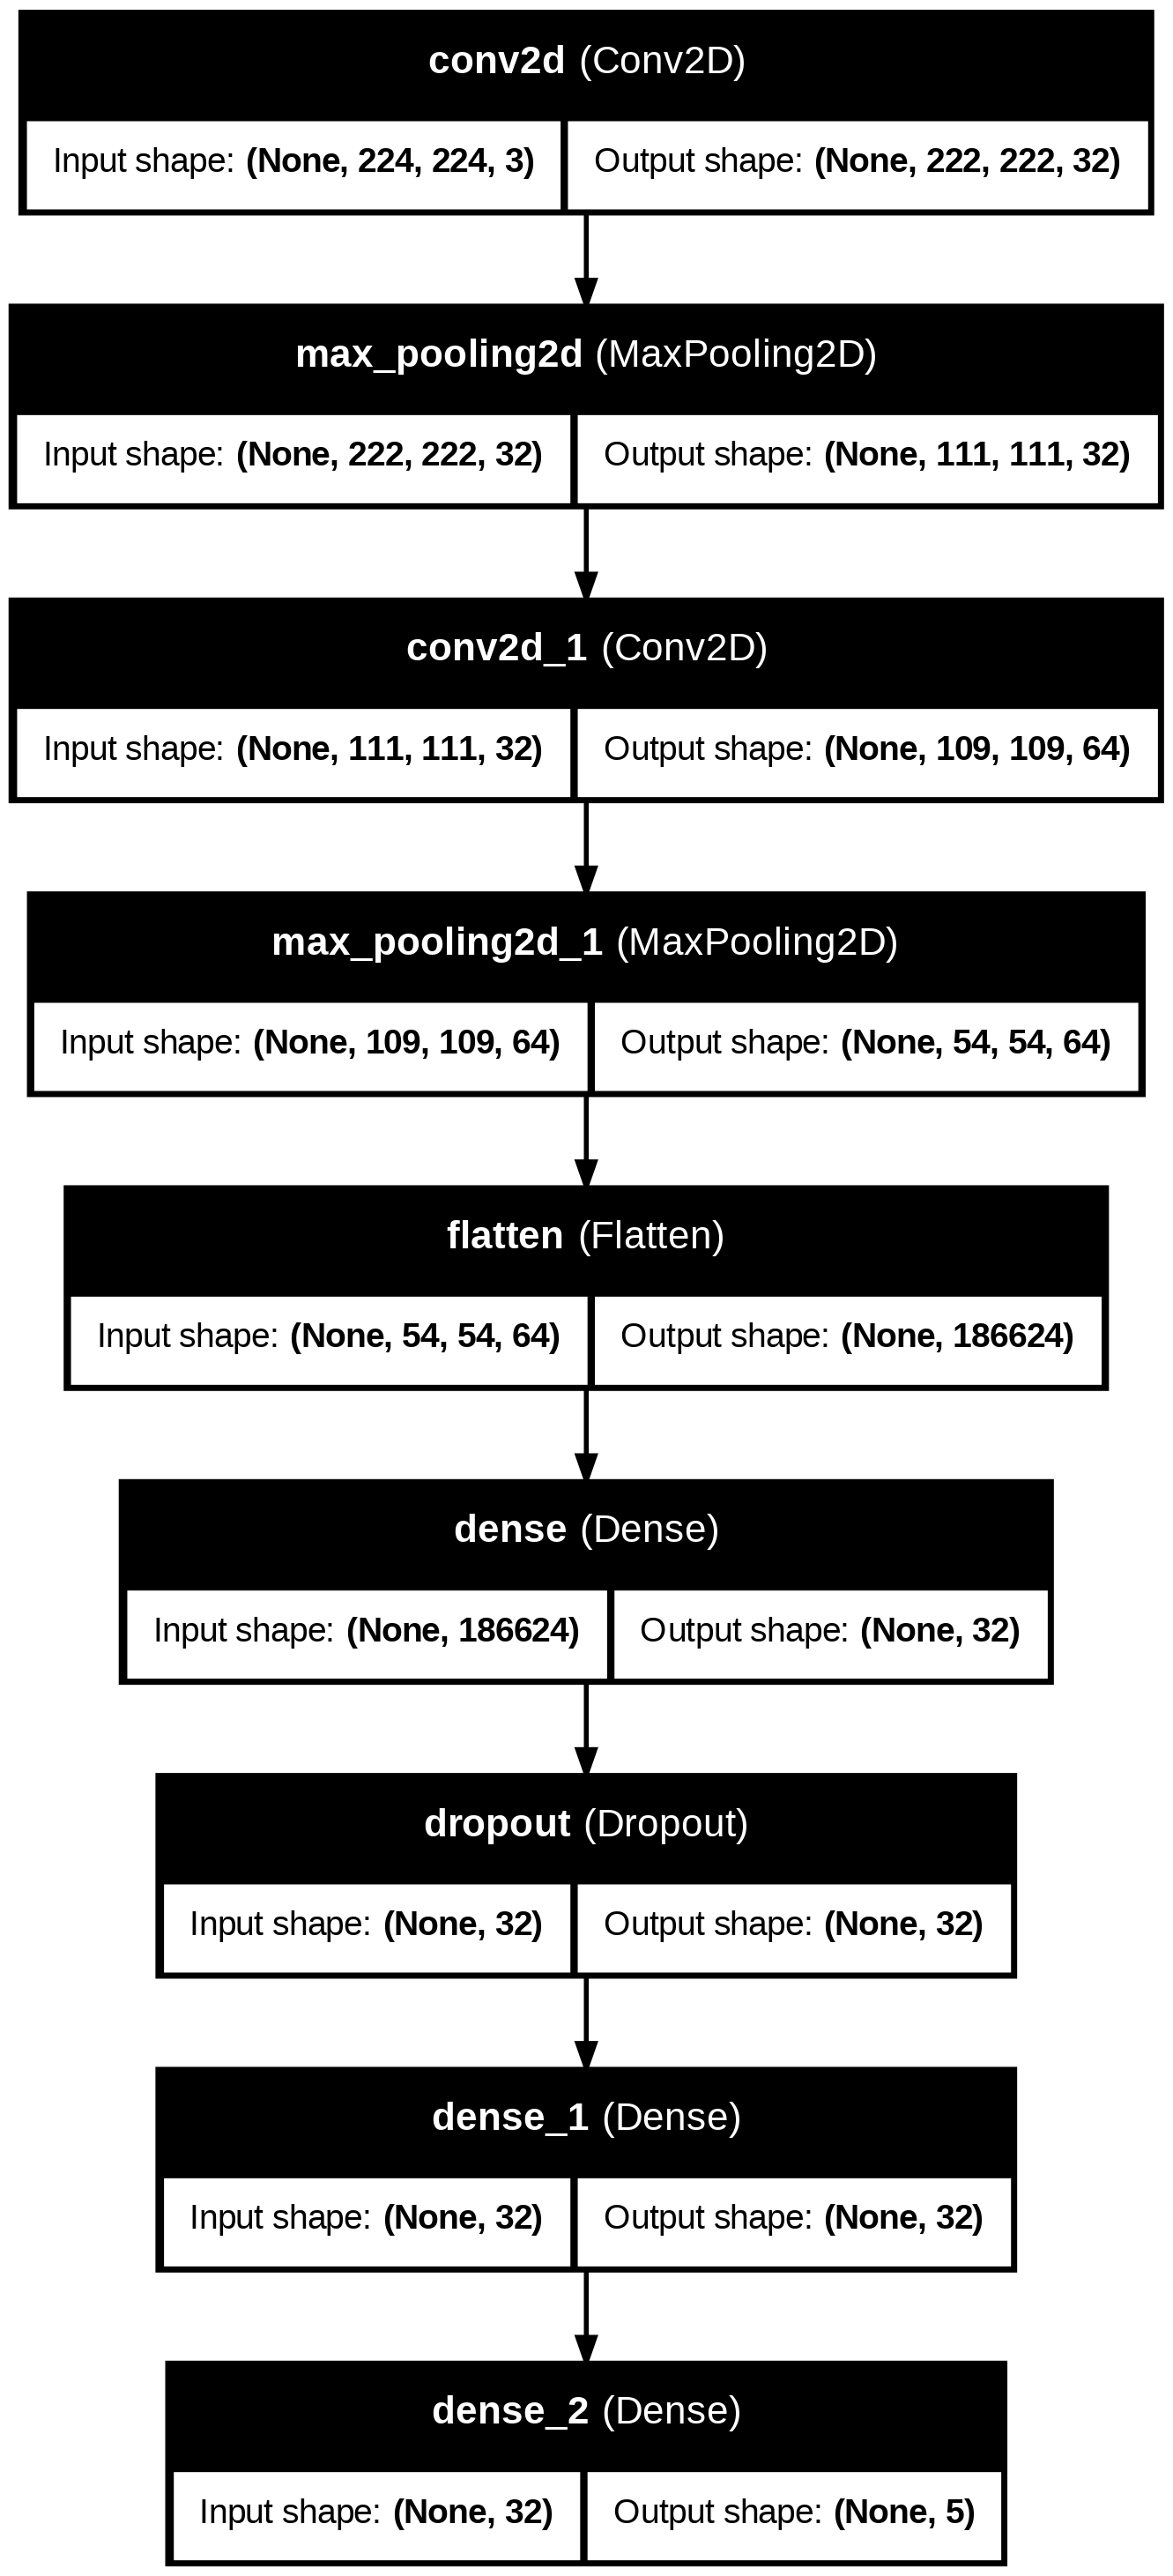

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(modeloInicial,
           to_file='modelo_pipeline.png',
           show_shapes=True,
           show_layer_names=True)

from IPython.display import Image
Image('modelo_pipeline.png')

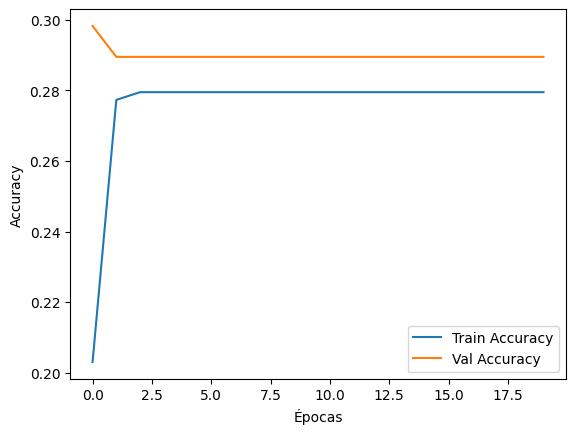

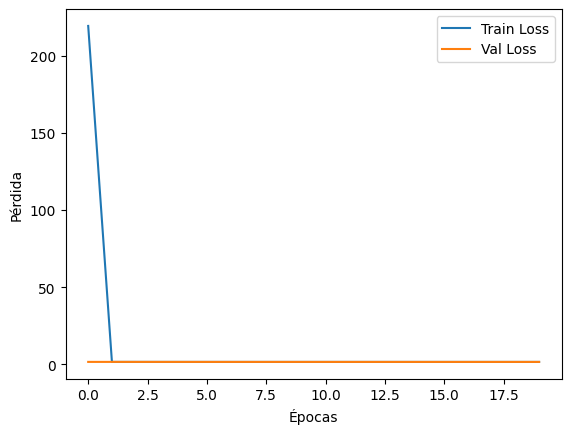

In [ ]:
plt.plot(historyInicial.history['accuracy'], label='Train Accuracy')
plt.plot(historyInicial.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyInicial.history['loss'], label='Train Loss')
plt.plot(historyInicial.history['val_loss'], label='Val Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


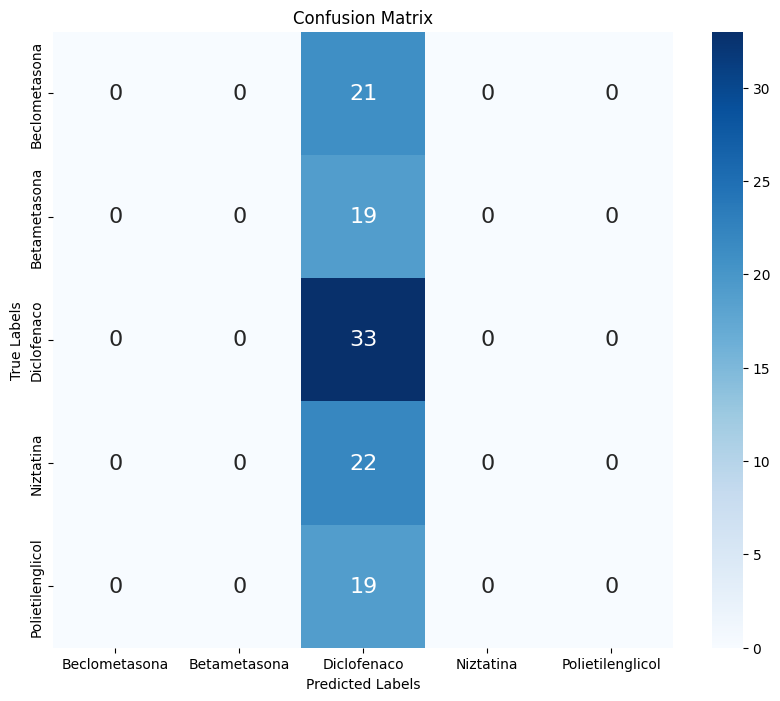

In [ ]:
y_pred = []
y_true = []

for images, labels in val_ds:
    predictions = modeloInicial.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
class_names = train_ds.class_names

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,annot_kws={"size":16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#**MODELO 2**

In [ ]:
data_dir = '/content/drive/MyDrive/ProyectoIA2/Entrenamiento'

batch_size = 16
img_height = 224
img_width = 224

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

modeloClasico = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(train_ds.class_names), activation='softmax')
])

modeloClasico.compile(optimizer=Adam(learning_rate=0.001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

epochs = 20
history = modeloClasico.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)



Found 572 files belonging to 5 classes.
Using 458 files for training.
Found 572 files belonging to 5 classes.
Using 114 files for validation.
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.2167 - loss: 25.6658 - val_accuracy: 0.2368 - val_loss: 1.5915
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.2712 - loss: 1.5616 - val_accuracy: 0.2193 - val_loss: 1.5381
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2929 - loss: 1.5416 - val_accuracy: 0.3509 - val_loss: 1.4028
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.4652 - loss: 1.3055 - val_accuracy: 0.5175 - val_loss: 1.2829
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5536 - loss: 1.1316 - val_accuracy: 0.4035 - val_loss: 1.6166
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5692 - loss: 1.2365 - val_accuracy: 0.6228 - val_loss: 1.1167
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6312 - loss: 0.9464 - val_ac

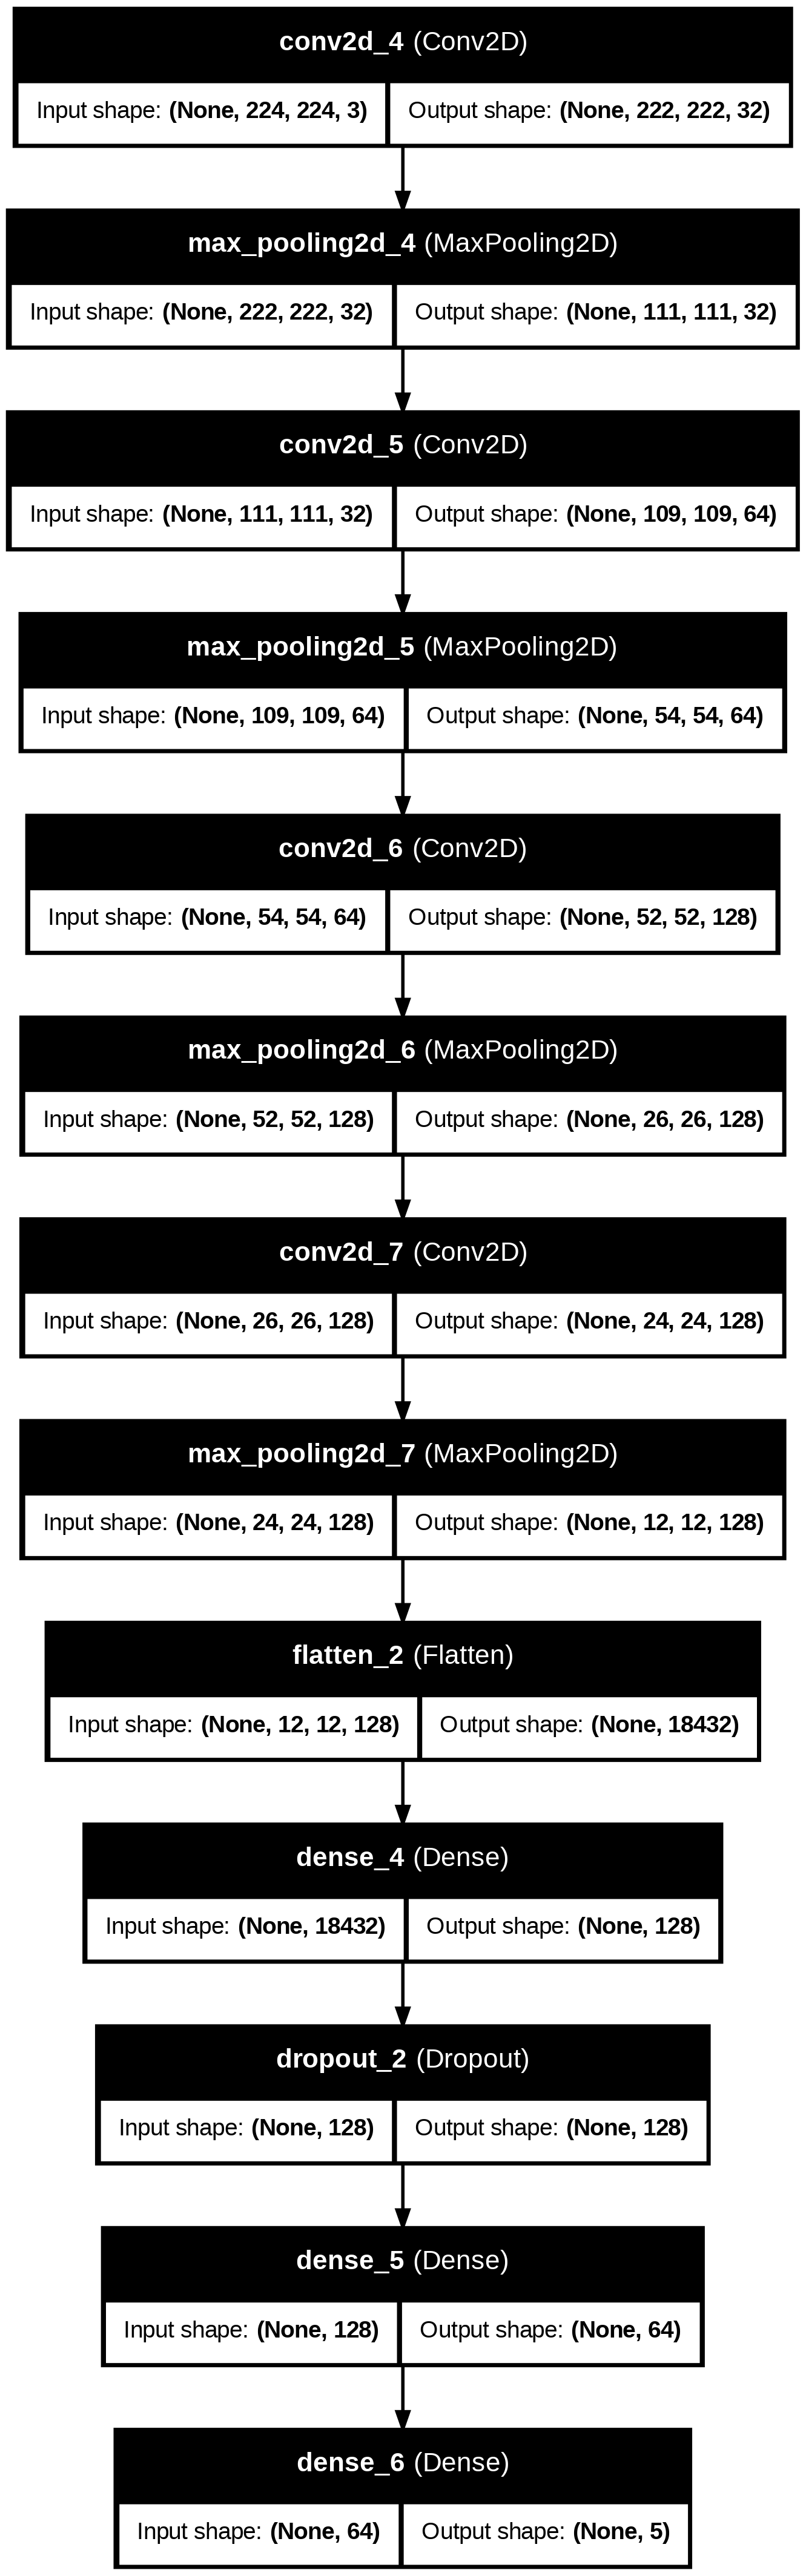

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(modeloClasico,
           to_file='modelo_pipeline.png',
           show_shapes=True,
           show_layer_names=True)

from IPython.display import Image
Image('modelo_pipeline.png')

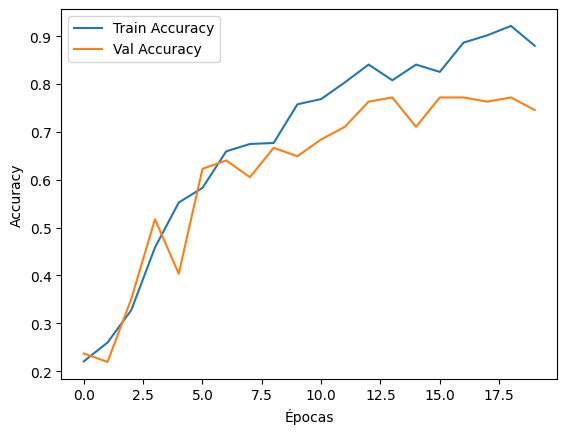

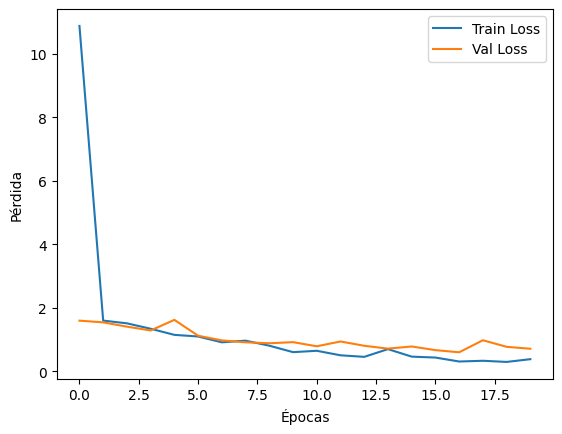

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


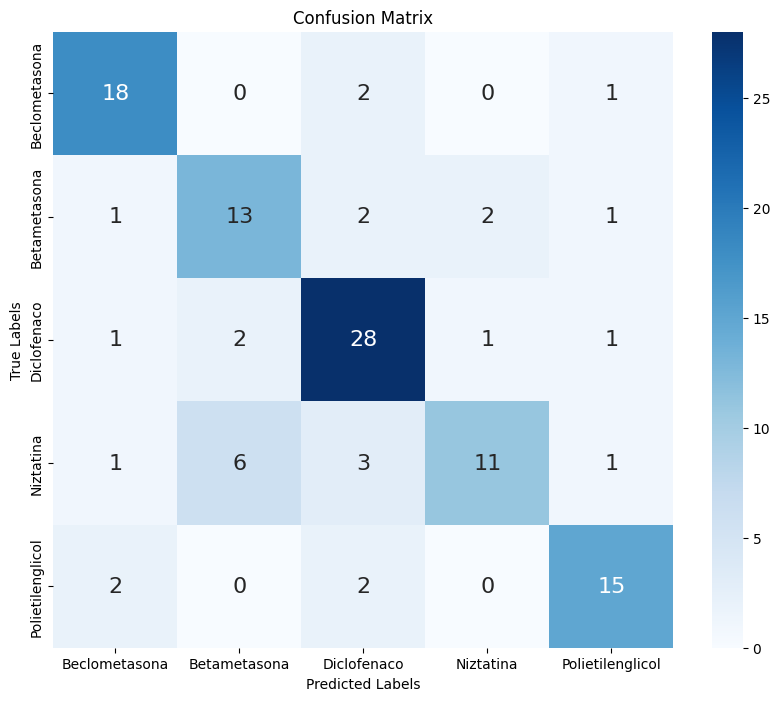

In [ ]:
y_pred = []
y_true = []

for images, labels in val_ds:
    predictions = modeloClasico.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
class_names = train_ds.class_names

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,annot_kws={"size":16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#**MODELO 3**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/drive/My Drive/ProyectoIA2/Entrenamiento'
test_dir = '/content/drive/My Drive/ProyectoIA2/Test'

batch_size = 16
img_height = 224
img_width = 224

train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
)

base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Congelar las capas de la base del modelo para no entrenarlas
base_model.trainable = False

# Crear el modelo
model = models.Sequential([
    base_model,  # Base de ResNet50
    layers.GlobalAveragePooling2D(),  # Pooling global para reducir la dimensionalidad
    layers.Dense(1024, activation='relu'),  # Capa densa
    layers.Dropout(0.5),  # Regularización por dropout
    layers.Dense(len(train_ds.class_names), activation='softmax')  # Capa final para clasificación
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
epochs = 10
history3 = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=test_ds
)


Found 572 files belonging to 5 classes.
Found 134 files belonging to 5 classes.
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 29s 508ms/step - accuracy: 0.3107 - loss: 1.8076 - val_accuracy: 0.5299 - val_loss: 1.4327
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.6674 - loss: 0.8842 - val_accuracy: 0.5597 - val_loss: 1.4483
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 0.8015 - loss: 0.5953 - val_accuracy: 0.5672 - val_loss: 1.4002
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.8426 - loss: 0.4423 - val_accuracy: 0.5522 - val_loss: 1.6173
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.9023 - loss: 0.3442 - val_accuracy: 0.5746 - val_loss: 1.6199
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - accuracy: 0.9303 - loss: 0.2470 - val_accuracy: 0.5373 - val_loss: 1.6462
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.9401 - loss: 0.2257 - val_accuracy: 0.5821 - val_loss: 1.6391
Epoch 8/10
36/36 ━━━

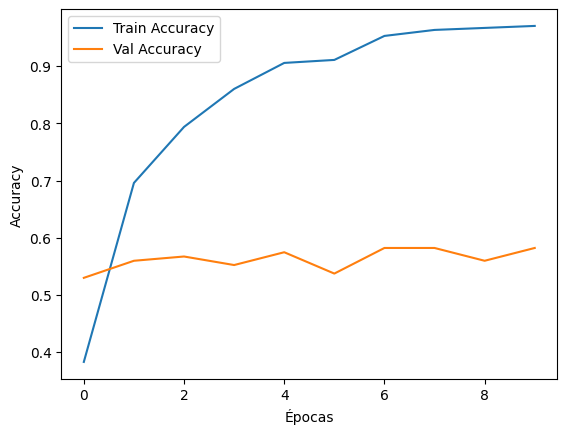

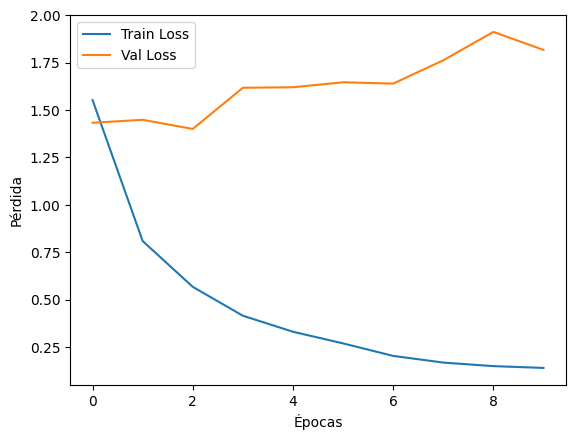

In [ ]:
# Gráfico de precisión
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfico de pérdida
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Val Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


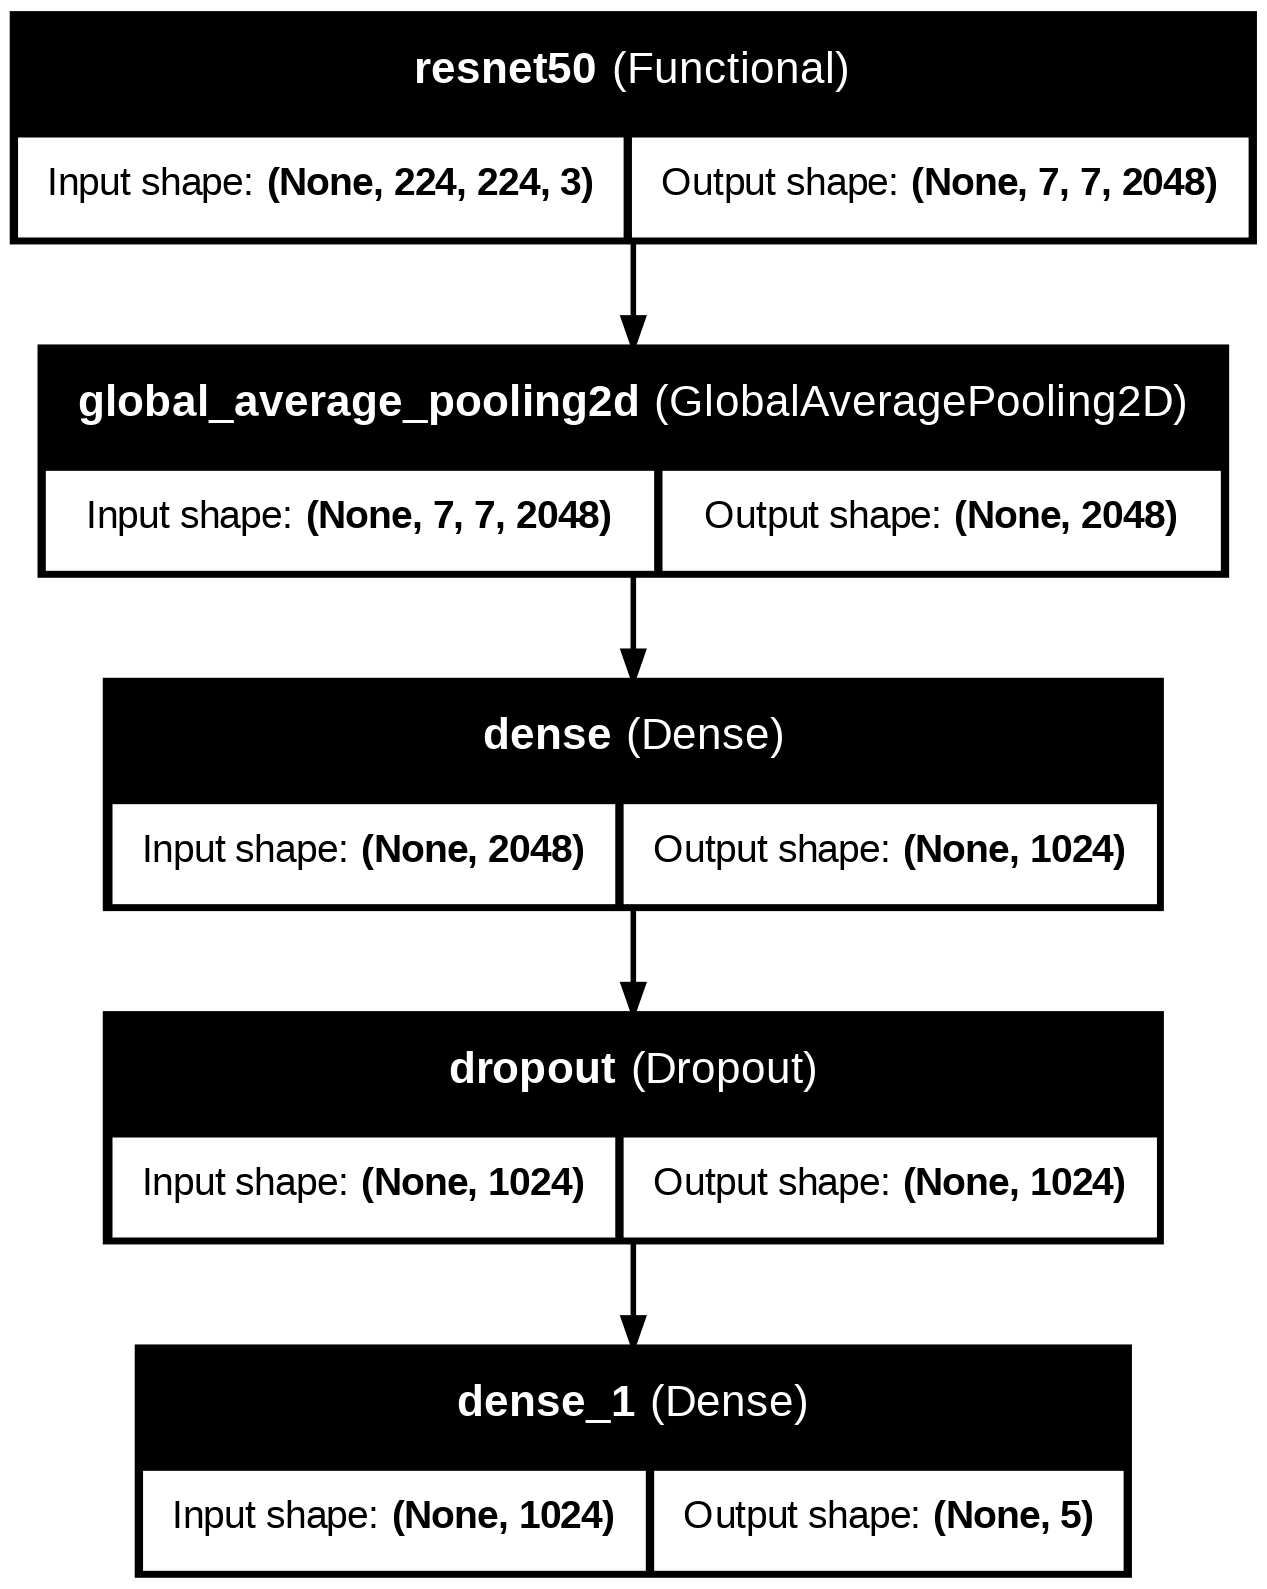

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,
           to_file='modelo_pipeline.png',
           show_shapes=True,
           show_layer_names=True)

from IPython.display import Image
Image('modelo_pipeline.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


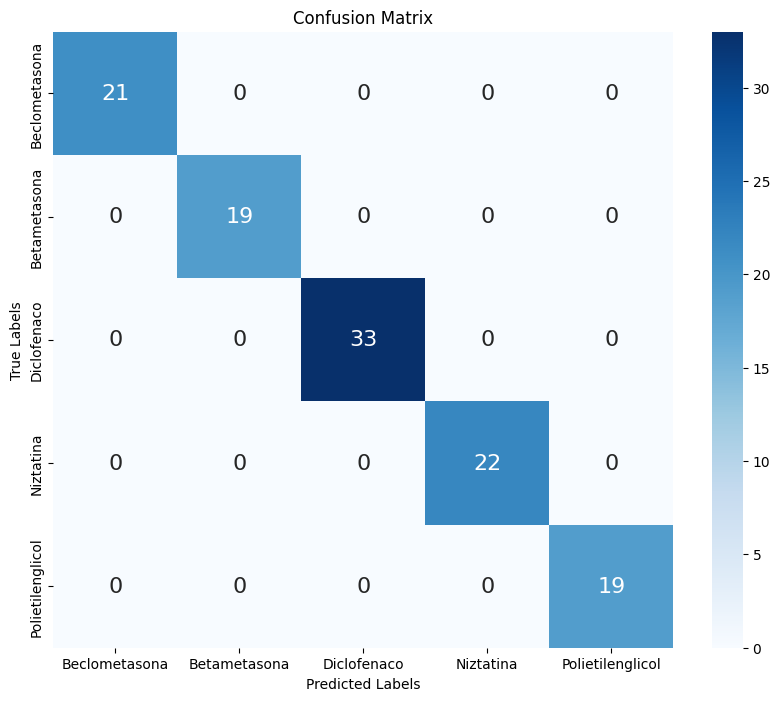

In [ ]:
y_pred = []
y_true = []

for images, labels in val_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
class_names = train_ds.class_names

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,annot_kws={"size":16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#**MODELO 4**

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import os

class ResNet50Model:
    def __init__(self, num_classes):
        self.model = resnet50(pretrained=True)
        self.model.fc = torch.nn.Linear(self.model.fc.in_features, num_classes)

    def train(self, train_loader, val_loader, epochs, learning_rate, device):
        self.model.to(device)
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            self.model.train()
            running_loss = 0.0
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader)}")

            self.evaluate(val_loader, device)

    def evaluate(self, val_loader, device):
        self.model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = self.model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Validation Accuracy: {100 * correct / total:.2f}%")

    def classify(self, image, transform, device):
        self.model.eval()
        self.model.to(device)

        image = transform(image).unsqueeze(0).to(device)
        with torch.no_grad():
            output = self.model(image)
            _, predicted = torch.max(output, 1)
        return predicted.item()


In [ ]:
# Transformaciones de las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Número de clases a clasificar
    num_classes = 5

    # Inicializa el modelo
    model = ResNet50Model(num_classes)

    # Ruta de ejemplo a una imagen
    image_path = '/content/drive/MyDrive/ProyectoIA2/Test/BECLOMETAZONA/20241124_140626.jpg'
    if not os.path.exists(image_path):
        print(f"La ruta {image_path} no existe.")
        exit()

    image = Image.open(image_path).convert('RGB')
    prediction = model.classify(image, transform, device)
    print(f"Predicción de la imagen: Clase {prediction}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 153MB/s]


Predicción de la imagen: Clase 1
